# Time series analysis

In [31]:
import pandas as pd
import matplotlib
import numpy as np
import statsmodels
import matplotlib.pyplot as plt

In [32]:
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("statsmodels:", statsmodels.__version__)
print("matplotlib.pyplot:", matplotlib.__version__)

pandas: 2.2.2
matplotlib: 3.10.0
numpy: 2.0.2
statsmodels: 0.14.5
matplotlib.pyplot: 3.10.0


# Data

import dataset: "data1.csv", the frist row has a Nan value

importazione del dataset : "data.csv"


import dataset: "data1.csv", the first row has a Nan value that we will clean.

importazione del dataset : "data.csv", la prima riga ha un valore Nan che viene eliminato.

In [33]:
data1 = pd.read_csv("data1.csv", sep=';', header=None)

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       1001 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [35]:
data1.head()

,0,1
0,NaN,0.00
1,2023-01-01,0.00
2,2023-01-02,1.53
3,2023-01-03,-1.87
4,2023-01-04,-2.14


In [36]:
print(data1.isnull().sum())

0    1
1    0
dtype: int64


In [37]:

data1 = data1.iloc[1:].reset_index(drop=True) # remouve the frist row


data1.iloc[:, 0] = pd.to_datetime(data1.iloc[:, 0], errors="coerce")
data1.iloc[:, 1] = pd.to_numeric(data1.iloc[:, 1], errors="coerce")


data1.columns = ["date", "value"]


data1 = data1.set_index("date")


/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2025-09-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [39]:
data1.head()

,value
date,
2023-01-01,0.00
2023-01-02,1.53
2023-01-03,-1.87
2023-01-04,-2.14
2023-01-05,-2.87


# **Data plot**

Plot the time serie data.

Viene rappresentata la serie temporale.

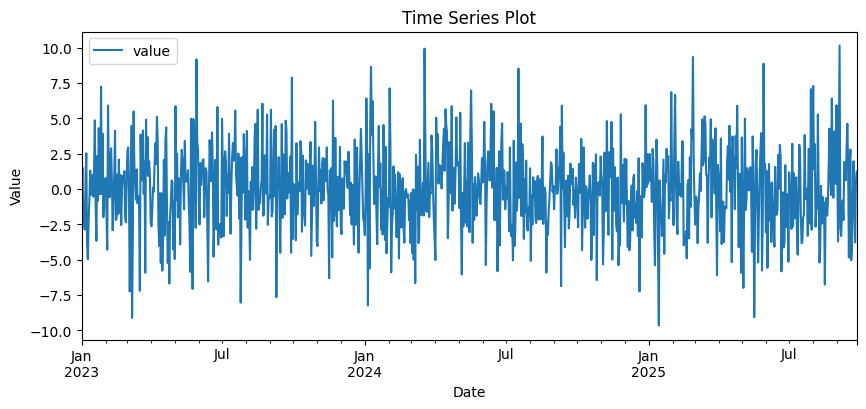

In [40]:
import matplotlib.pyplot as plt

data1.plot(figsize=(10,4)) # grafico serie temporale
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot")
plt.show()


# Stationarity

**ADF test**

A first test is performed on the series (Dickey-Fuller Test) on the stationarity of the series, which confirms its stationarity.




Si effettua un primo test sulla serie ( Test di Dickey-Fuller ) sulla stazionarietà della serie, il quale ci conferma la stazionarietà.

In [41]:
from statsmodels.tsa.stattools import adfuller

ts_value = data1["value"]

result = adfuller(ts_value, autolag="AIC") # ADF test
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Used lags:", result[2])
print("Number of observations:", result[3])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("➡️ La serie è stazionaria (rifiuto H0)")
else:
    print("➡️ La serie NON è stazionaria (non rifiuto H0)")


ADF Statistic: -17.48923304194527
p-value: 4.4461493284821756e-30
Used lags: 2
Number of observations: 997
Critical Values: {'1%': np.float64(-3.4369259442540416), '5%': np.float64(-2.8644432969122833), '10%': np.float64(-2.5683158550174094)}
➡️ La serie è stazionaria (rifiuto H0)


# ACF & PACF

We proceed by plotting the ACF and PACF correlograms. Looking at the correlograms, only two lags, 25 and 26, have values outside the bands, but this appears currently irrelevant, assuming we are dealing with white noise.

Si procede andando a tracciare i correlogrammi ACF e PACF, guardando ai correlogrammi si osservano solo due lag 25 e lag 26 avere valori oltre le bande ma ciò appare al momento inifluente, suppendendo che siamo di fronte a rumore bianco.

<Figure size 640x480 with 0 Axes>

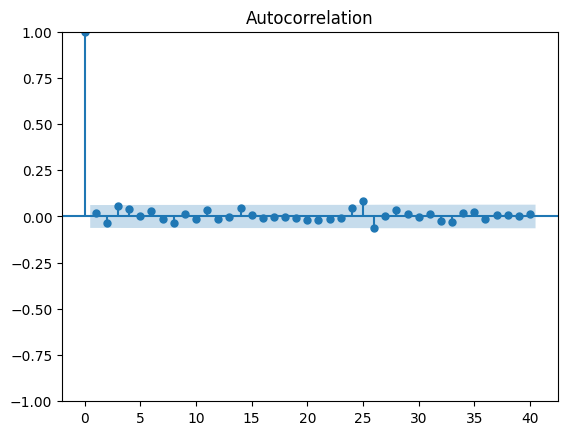

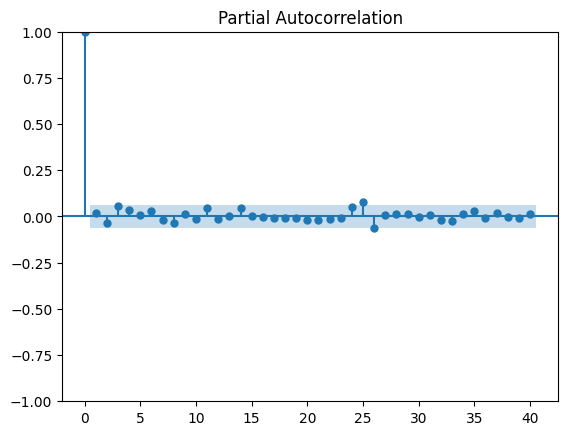

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF e PACF

fig = plt.figure()
plot_acf(data1['value'], lags=40)
plot_pacf(data1['value'], lags=40)
plt.show()

# White noise

# #

A test for white noise is performed (Ljung-Box test), which confirms that we are dealing with white noise

Si effettua un test per il rumore bianco ( white noise ), si tratta del test di Ljung-Box che conferma che siamo di fronte a rumore bianco.

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(data1["value"], lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  9.242266   0.509276
